# How to convert a csv to shp

Make sure you have these libraries installed:
* Matplotlib
* Geopandas
* Pandas

To obtain the ESRI WKT for your co-ordinates, go to the website - [https://epsg.io/](https://epsg.io/) and then search for the CRS your CSV was made from. The default CRS is **EPSG:4326** so try that if you can't find yours. Then copy the **ESRI WKT** string from the export section of the CRS search page.


In [27]:
import pandas as pd 
import geopandas as gpd

def convert_csv_to_shp(csv_file_loc, cur_esri_wkt, to_crs, output_filename):
    
    # Read the .csv file using Pandas 
    data = pd.read_csv(csv_file_loc)

    # Creating GeoPandas GeoDataFrame using the Pandas Dataframe 
    gdf = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data['LONGITUDE_GDA94'],data['LATITUDE_GDA94'] ))
    
    # Plot the points - optional
    # gdf.plot(markersize = 1.5, figsize = (10,10))
    
    # Save it as a shp file in a tmp folder that we'll delete later!
    !mkdir 'tmp_shp'
    gdf.to_file(filename = 'tmp_shp/tmp.shp', driver = 'ESRI Shapefile', crs_wkt = cur_esri_wkt)
    
    # To Reproject we'll have to re-read it and then change the CRS
    # Read the shp file
    shp_tmp = gpd.read_file('tmp_shp/tmp.shp')
    
    # Reproject the crs
    shp_file = shp_tmp.to_crs(epsg=3107)
    shp_file.plot()
    
    # Save the new shp file in a new exported_shp directory
    file_dir = '{}_shp'.format(output_filename)
    !mkdir $file_dir
    shp_file.to_file('{}/{}.shp'.format(file_dir, output_filename), driver='ESRI Shapefile')
    
    # Remove the temporary shape file. Comment it if you wanna keep that too!
    !rm -rf 'tmp_shp/'

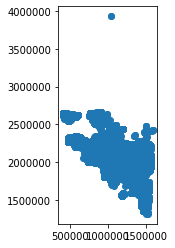

In [28]:
# Obtain the ESRI WKT for your desired CRS from the website https://epsg.io/
# Copy ESRI WKT from the export section of the CRS

ESRI_WKT = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]'

convert_csv_to_shp(csv_file_loc = 'vectors_mineralized.csv', 
                   cur_esri_wkt = ESRI_WKT, 
                   to_crs = 3107, 
                   output_filename = 'vectors_mineralized')

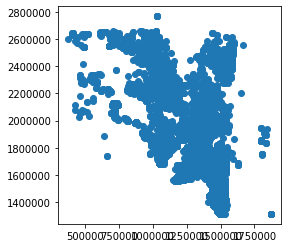

In [29]:
# Obtain the ESRI WKT for your desired CRS from the website https://epsg.io/
# Copy ESRI WKT from the export section of the CRS

ESRI_WKT = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]'

convert_csv_to_shp(csv_file_loc = 'vectors_unmineralized.csv', 
                   cur_esri_wkt = ESRI_WKT, 
                   to_crs = 3107, 
                   output_filename = 'vectors_unmineralized')